## Objective
The goal is to use most common visualizaton libraries to perform exploratory data analysis of a dataset about Apple Appstore strategy games, and try to get some insights on what combination of features would most likely yield a good user rating (> 4.0/5.0)

## Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the dataset
games = pd.read_csv('appstore_games.csv')
games2 = games.copy()
#drop unwanted columns
games2 = games2.drop(columns='URL')
games2 = games2.drop(columns='Icon URL')
#rename columns
games2.columns= ['ID', 'Name','Subtitle','User_Rating','User_Rating_Count','Price','In_App_Purchase','Desc','Dev','Age_Rating','Languages','Size','Primary_Genre','Genre','Release_Date','Current_Version_Date']
games2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 16 columns):
ID                      17007 non-null int64
Name                    17007 non-null object
Subtitle                5261 non-null object
User_Rating             7561 non-null float64
User_Rating_Count       7561 non-null float64
Price                   16983 non-null float64
In_App_Purchase         7683 non-null object
Desc                    17007 non-null object
Dev                     17007 non-null object
Age_Rating              17007 non-null object
Languages               16947 non-null object
Size                    17006 non-null float64
Primary_Genre           17007 non-null object
Genre                   17007 non-null object
Release_Date            17007 non-null object
Current_Version_Date    17007 non-null object
dtypes: float64(4), int64(1), object(11)
memory usage: 2.1+ MB


In [3]:
#drop games without rating
games2 = games2[pd.notnull(games2['User_Rating'])]

In [4]:
#clean up time data
import datetime
games2['Release_Date'] = pd.to_datetime(games2['Release_Date'])
games2['Current_Version_Date'] = pd.to_datetime(games2['Current_Version_Date'])

#create new column for time gap between release & update
games2['Update_Gap']=games2.Current_Version_Date-games2.Release_Date
games2.head()

,ID,Name,Subtitle,User_Rating,User_Rating_Count,Price,In_App_Purchase,Desc,Dev,Age_Rating,Languages,Size,Primary_Genre,Genre,Release_Date,Current_Version_Date,Update_Gap
0,284921427,Sudoku,NaN,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",2008-11-07,2017-05-30,3126 days
1,284926400,Reversi,NaN,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",2008-11-07,2018-05-17,3478 days
2,284946595,Morocco,NaN,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",2008-11-07,2017-05-09,3105 days
3,285755462,Sudoku (Free),NaN,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",2008-07-23,2017-05-30,3233 days
4,285831220,Senet Deluxe,NaN,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",2008-07-18,2018-07-22,3656 days


## Visualization

### App Counts

In [5]:
#clean up and organize Genre feature
games2['Genre'] = games2['Genre'].str.replace(',', '').str.replace('Games', '').str.replace('Entertainment', '').str.replace('Strategy', '') 
games2['Genre'] = games2['Genre'].str.split(' ').map(lambda x: ' '.join(sorted(x)))
games2['Genre']=games2['Genre'].str.strip()
Non_Main_Genre=games2[~games2.Genre.str.contains('Puzzle') & \
                           ~games2.Genre.str.contains('Action') & \
                           ~games2.Genre.str.contains('Family')& \
                           ~games2.Genre.str.contains('Education')& \
                           ~games2.Genre.str.contains('Family')& \
                           ~games2.Genre.str.contains('Adventure')&\
                           ~games2.Genre.str.contains('Board')&\
                           ~games2.Genre.str.contains('Role')].index
games2.drop(Non_Main_Genre , inplace=True)
games2.loc[games2['Genre'].str.contains('Puzzle'),'Genre'] = 'Puzzle'
games2.loc[games2['Genre'].str.contains('Board'),'Genre'] = 'Puzzle'
games2.loc[games2['Genre'].str.contains('Action'),'Genre'] = 'Action'
games2.loc[games2['Genre'].str.contains('Adventure'),'Genre'] = 'Adventure'
games2.loc[games2['Genre'].str.contains('Role'),'Genre'] = 'Adventure'
games2.loc[games2['Genre'].str.contains('Family'),'Genre'] = 'Family'
games2.loc[games2['Genre'].str.contains('Education'),'Genre'] = 'Family'

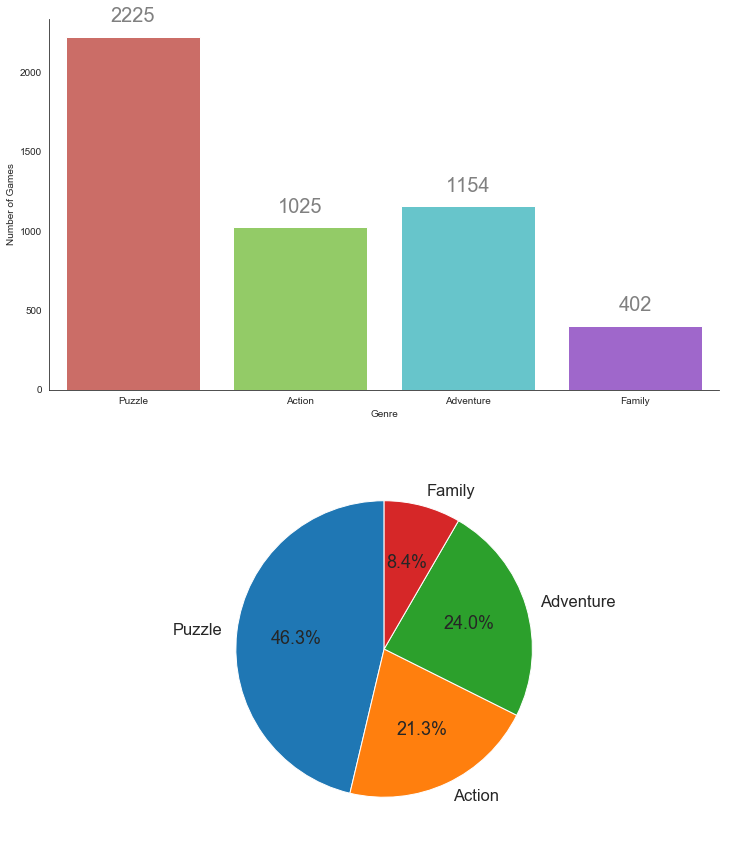

In [6]:
#visualization to compare app counts across genres
sns.set_style('white')
f, axes = plt.subplots (2,1, figsize=(12,15))

#Bar chart
x=['Puzzle','Action','Adventure','Family']
y = [games2.Genre[(games2['Genre']=='Puzzle')].count(),games2.Genre[(games2['Genre']=='Action')].count(),\
     games2.Genre[(games2['Genre']=='Adventure')].count(),games2.Genre[(games2['Genre']=='Family')].count()]

vis1= sns.barplot(x,y,palette='hls',ax=axes[0])
vis1.set(xlabel='Genre',ylabel='Number of Games')
for p in vis1.patches:
             vis1.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=20, color='gray', xytext=(0, 20),
                 textcoords='offset points')
sns.despine(top=True, right=True, left=False, bottom=False)
sns.set(font_scale=1.5)


#Pie Chart
NG = [games2.Genre[(games2['Genre']=='Puzzle')].count(),games2.Genre[(games2['Genre']=='Action')].count(),\
     games2.Genre[(games2['Genre']=='Adventure')].count(),games2.Genre[(games2['Genre']=='Family')].count()]
G = ['Puzzle','Action','Adventure','Family']

plt.pie(NG, labels=G, startangle=90, autopct='%.1f%%')

plt.show()


#plt.ioff()

### Average Score Comparison

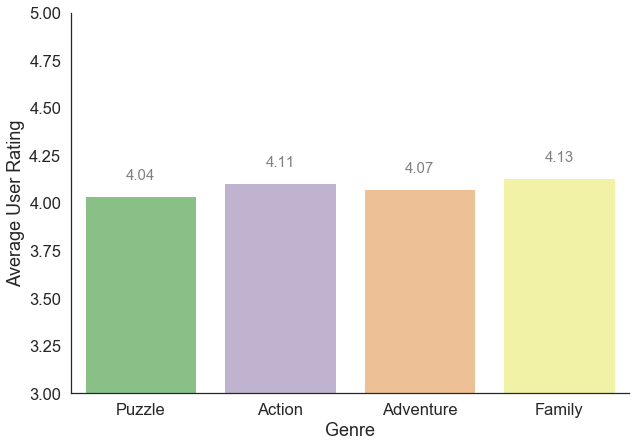

In [7]:
#compare the average score across 4 genres
plt.figure(figsize=(10,7))
sns.set_style('white')
x=['Puzzle','Action','Adventure','Family']
y = [games2.User_Rating[(games2['Genre']=='Puzzle')].mean(),\
     games2.User_Rating[(games2['Genre']=='Action')].mean(),\
     games2.User_Rating[(games2['Genre']=='Adventure')].mean(),\
     games2.User_Rating[(games2['Genre']=='Family')].mean()]

vis1= sns.barplot(x,y,palette='Accent')
vis1.set(xlabel='Genre',ylabel='Average User Rating')
vis1.set(ylim=(3,5))
sns.despine(top=True, right=True, left=False, bottom=False)


for p in vis1.patches:
             vis1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, color='gray', xytext=(0, 20),
                 textcoords='offset points')

### Does Size Matter?

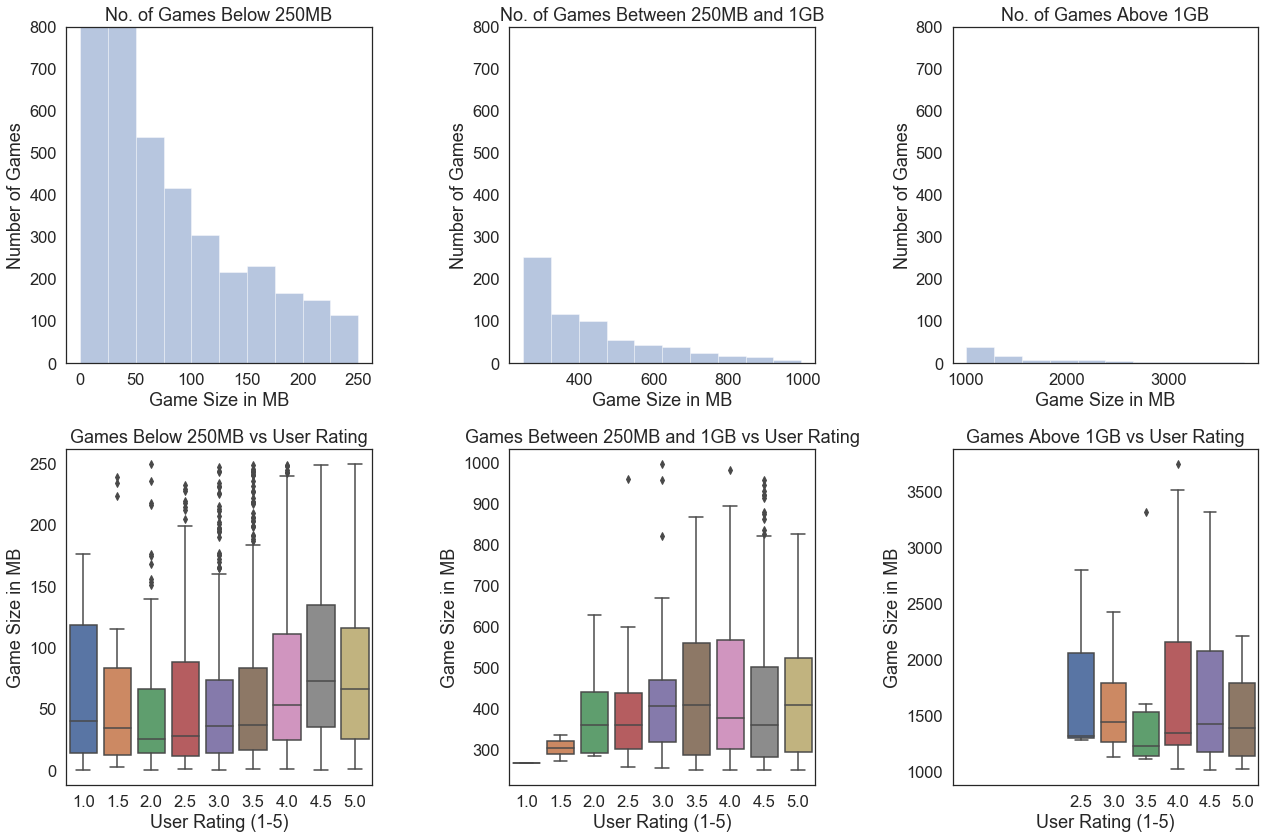

In [8]:
#explore if there is any correlation between app size and score
games2['Size2'] = round(games2['Size']/1000000,1)
Size_Less_250MB = games2[games2.Size2 <250]
Size_More_250MB = games2[(games2.Size2 >=250) & (games2.Size2 <1000)]
Size_More_1GB = games2[games2.Size2 >=1000]

sns.set_style('white')
f, axes = plt.subplots (2,3, figsize=(18,12))

vis1 = sns.boxplot( data = Size_Less_250MB, x = 'User_Rating', y = 'Size2',  ax=axes[1,0])
vis2 = sns.boxplot( data = Size_More_250MB, x = 'User_Rating', y = 'Size2', ax=axes[1,1])
vis3 = sns.boxplot( data = Size_More_1GB, x = 'User_Rating', y = 'Size2', ax=axes[1,2],)
vis4 = sns.distplot(Size_Less_250MB.Size2, bins= 10, kde=False,ax=axes[0,0])
vis5 = sns.distplot(Size_More_250MB.Size2, bins= 10, kde=False,ax=axes[0,1])
vis6 = sns.distplot(Size_More_1GB.Size2, bins= 10, kde=False,ax=axes[0,2])

vis1.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
vis2.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
vis3.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
vis4.set(xlabel='Game Size in MB',ylabel='Number of Games')
vis5.set(xlabel='Game Size in MB',ylabel='Number of Games')
vis6.set(xlabel='Game Size in MB',ylabel='Number of Games')

axes[0, 0].set_title('No. of Games Below 250MB')
axes[0, 1].set_title('No. of Games Between 250MB and 1GB')
axes[0, 2].set_title('No. of Games Above 1GB')
axes[1, 0].set_title('Games Below 250MB vs User Rating')
axes[1, 1].set_title('Games Between 250MB and 1GB vs User Rating')
axes[1, 2].set_title('Games Above 1GB vs User Rating')
vis3.set(xlim=(-4, 5.5))

vis4.set(ylim=(0, 800))
vis5.set(ylim=(0, 800))
vis6.set(ylim=(0, 800))
plt.tight_layout()

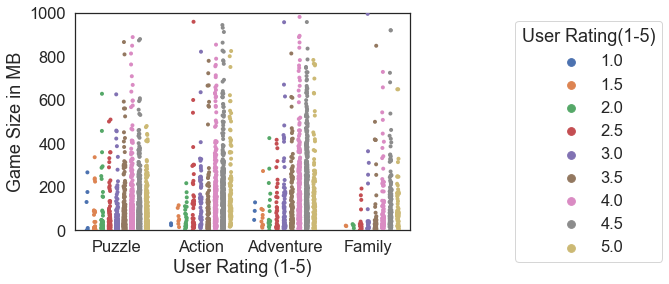

In [9]:
vis1= sns.stripplot(y='Size2' , x='Genre', data=games2,\
                hue='User_Rating',dodge=True, size=4)

plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.29, 1))

vis1.set(ylim=(0, 1000))
vis1.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
plt.ioff()

There doesn't seem to be any obvious correlations between app size and score

### Trend in Size Change

[Text(0, 0.5, 'Game Size in MB'), Text(0.5, 0, 'Year')]

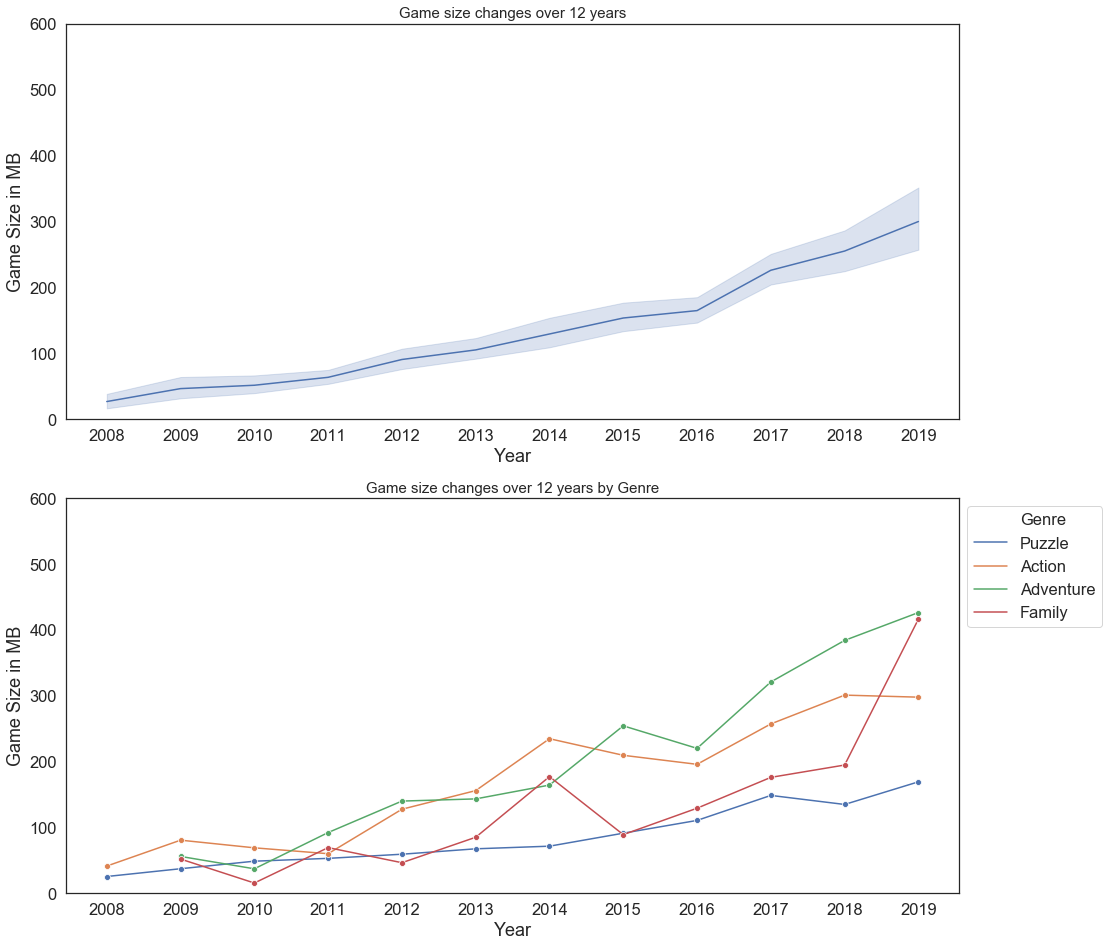

In [10]:
games2['Year'] = games2['Release_Date']
games2['Year']=games2['Year'].astype(str)
#extract year ony
for i in (list(games2.index.values)):
    games2['Year'][i]=games2['Year'][i][:4]
    
g, axes = plt.subplots (2,1, figsize=(16,16))

vis1 = sns.lineplot(x=games2.Year, y=games2.Size2, data=games2, ax=axes[0])
vis1.set(ylim=(0, 600))
vis2 = sns.lineplot(x=games2.Year, y=games2.Size2, hue=games2.Genre, err_style=None, marker='o',ax=axes[1])
vis2.set(ylim=(0, 600))
plt.legend(bbox_to_anchor=(1, 1))

axes[0].set_title('Game size changes over 12 years',fontsize=15)
axes[1].set_title('Game size changes over 12 years by Genre',fontsize=15)

vis1.set(xlabel='Year',ylabel='Game Size in MB')
vis2.set(xlabel='Year',ylabel='Game Size in MB')



The average size of games has been steadily increasing through out last decade, from less than 50MB in 2008 to just over 300MB in 2019. From the bottem figure we can see that each genre is increasing in size, with Adventure games increasing ~200MB in the past 3 years, and puzzle games increasing more gradually and steadily.

### App Price

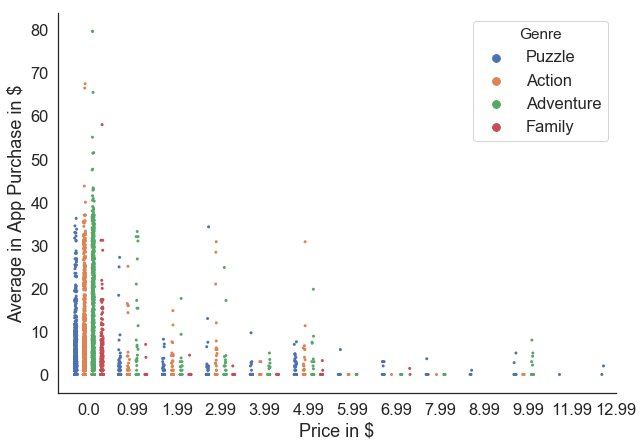

In [11]:
import statistics
plt.figure(figsize=(10,7))
games2['In_App_Purchase'] = games2['In_App_Purchase'].str.replace(',', '') 
games2.In_App_Purchase=games2.In_App_Purchase.fillna(0)

for i in (list(games2.index.values)):
    if games2.In_App_Purchase[i] ==0:
        games2['In_App_Purchase'][i]=0.01
    elif games2.In_App_Purchase[i] !=0:
        A=str.split(games2.In_App_Purchase[i])
        A=[float(i) for i in A]
        games2['In_App_Purchase'][i]=statistics.mean(A)
vis1= sns.stripplot(y=games2.In_App_Purchase , x=games2.Price, data=games2, hue=games2.Genre, dodge=True, size=3)

vis1.set(xlabel='Price in $',ylabel='Average in App Purchase in $')
vis1.set(xlim=(-0.7, 12))
sns.despine(top=True, right=True, left=False, bottom=False)

The pricier the games get, the lower the In-App Purchase items are. This is expected as low and free games needs to sustain with some form of income.

### Age Rating Distribution

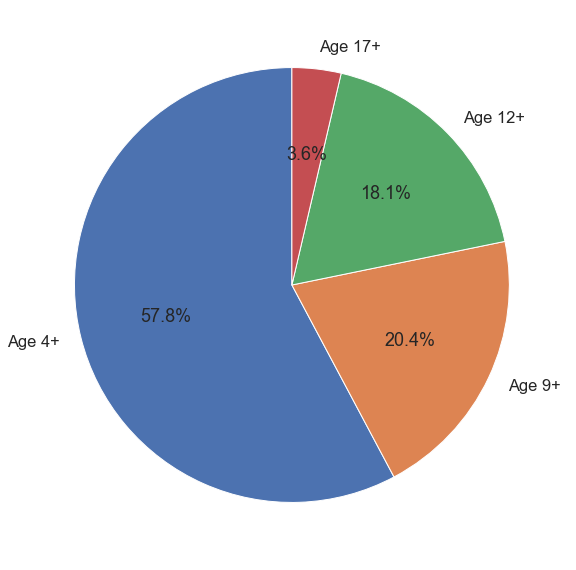

In [12]:
plt.figure(figsize=(10,10))
NAR = [games2.Age_Rating[(games2['Age_Rating']=='4+')].count(),games2.Age_Rating[(games2['Age_Rating']=='9+')].count(),\
     games2.Age_Rating[(games2['Age_Rating']=='12+')].count(),games2.Age_Rating[(games2['Age_Rating']=='17+')].count()]
AR = ['Age 4+','Age 9+','Age 12+','Age 17+']

plt.pie(NAR, labels=AR, startangle=90, autopct='%.1f%%')
plt.show()

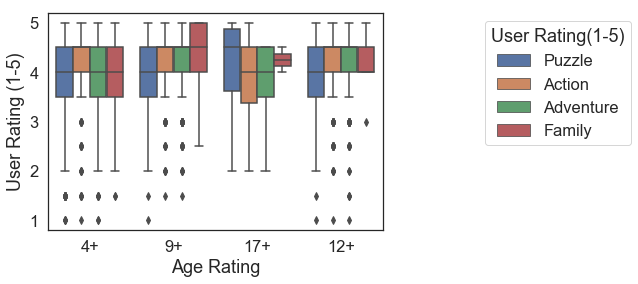

In [13]:
vis1 = sns.boxplot(x=games2.Age_Rating, y=games2.User_Rating, data=games2, hue=games2.Genre, dodge=True)

vis1.set(xlabel='Age Rating',ylabel='User Rating (1-5)')
plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.28, 1))